# Интернет-магазин компьютерных игр

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План работы:**

1. Изучение общей информации

2. Подготовка данных

3. Исследовательский анализ данных

4. Портрет пользователя каждого региона

5. Проверка гипотезы

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats as st
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/datasets/games.csv', sep=',') # загрузим данные из датафрейма

In [3]:
# Изучим исходный датафрейм, выведем первые 10 строчек
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Изучим исходную информацию датафрейма
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


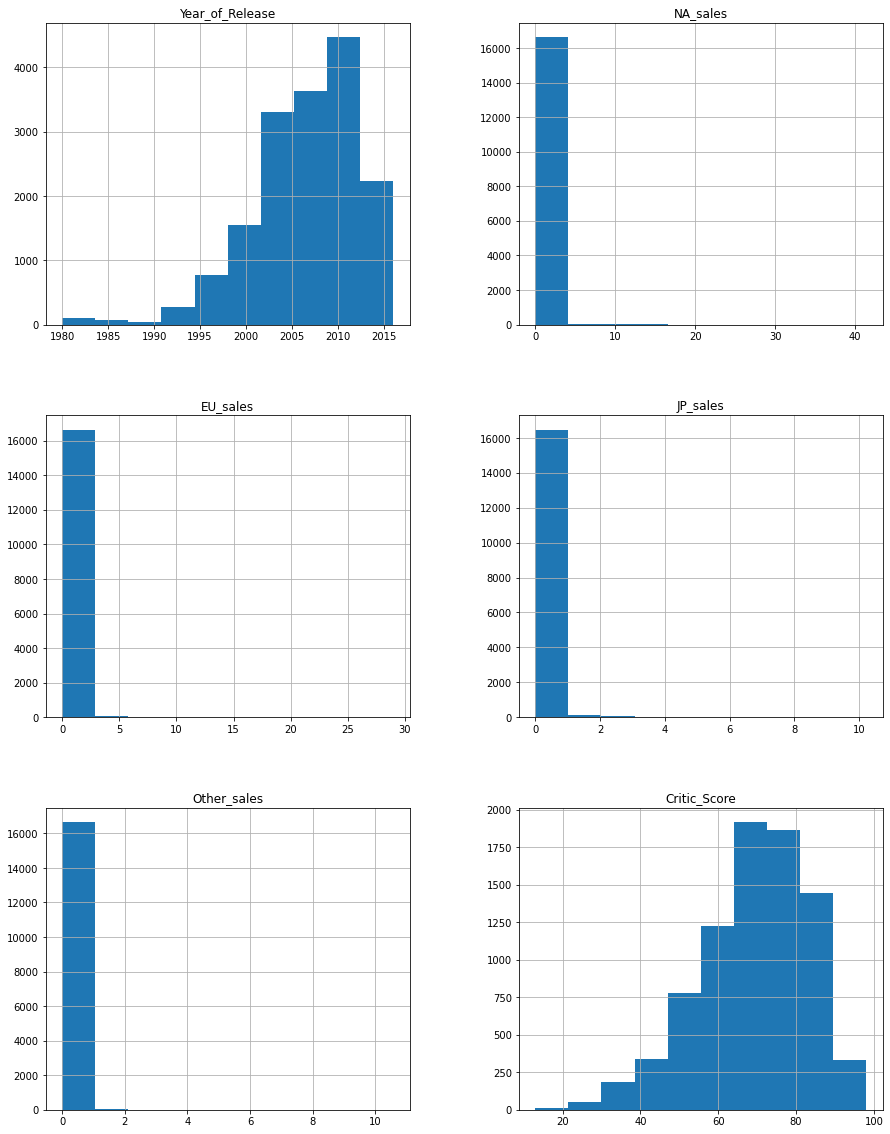

In [5]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20)); 

### 2. Предобработка данных

#### 2.1 Замена названий столбцов (приведем к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head(5) # проверим названия столбцов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2 Определение пропущенных значений

##### 2.2.1 Определение в каких столбцах есть пропуски

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# Пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (25,6), rot = -5, legend = False, fontsize = 20)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

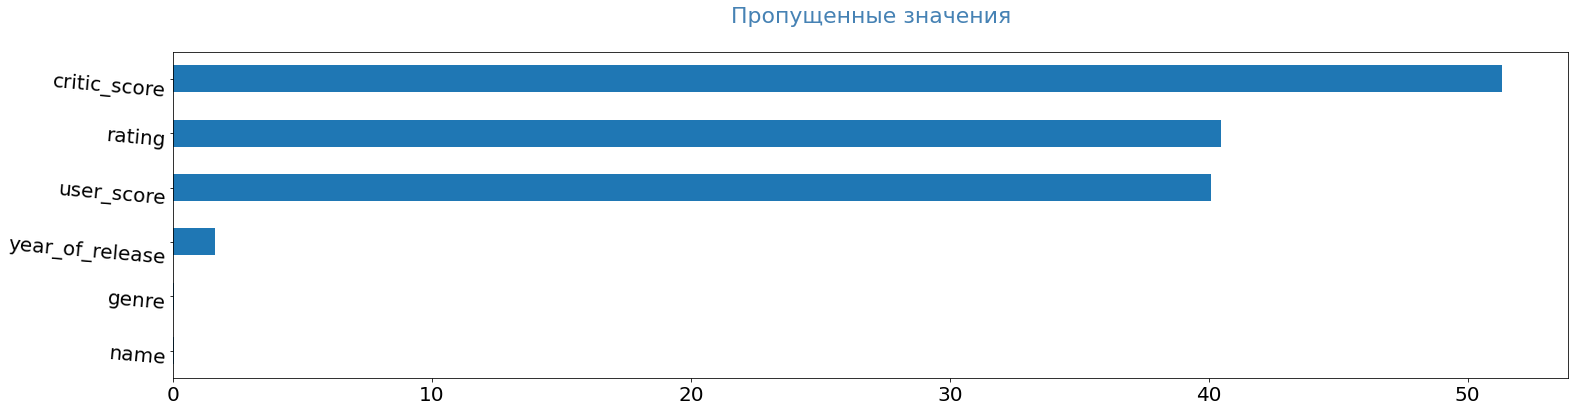

In [10]:
pass_value_barh(data)

In [11]:
#Посчитаем количество дубликатов
data.duplicated().sum()

0

##### 2.2.2 Заполнение пропущенных значений

In [12]:
# Удаляем записи, где отсутствует название игры name
data.dropna(subset=['name'], inplace=True)

In [13]:
# Удаляем записи, где отсутствует год выпуска игры year_of_release
data.dropna(subset=['year_of_release'], inplace=True)

In [14]:
# Удаляем записи, где отсутствует жанр игры genre
data.dropna(subset=['genre'], inplace=True)

In [15]:
# Так как в столбце user_score значение 'tbd' фактически и является NaN, заменим 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [16]:
# Заменим пропущенные значения в столбце rating 
data['rating'] = data['rating'].fillna('неизвестно')

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### 2.3 Рассмотрение типов данных в каждом столбце

In [18]:
# Приводим в целочисленный тип столбец год выпуска year_of_release
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [19]:
# Приводим к вещественному типу столбец оценка пользователей user_score
data['user_score'] = data['user_score'].astype(float)

#### 2.4 Посчет суммарных продаж во всех регионах

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # сумму запишем в отдельный столбец total_sales 

### 3. Исследовательский анализ данных

#### 3.1 Рассмотрим, сколько игр выпускалось в разные годы

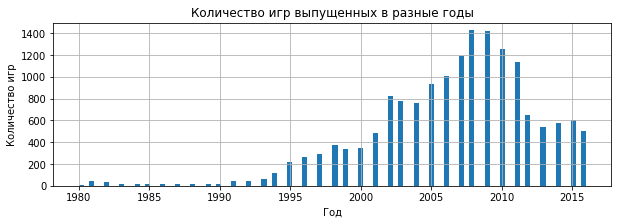

In [22]:
data.year_of_release.hist(bins = 100, figsize = (10,3));
plt.title('Количество игр выпущенных в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр');

**Вывод:** Из графика видно, что количество игр на компьютеры и игровые приставки начало расти с 90-ых годов до 2008 года. В 2008-09 годах наблюдается пик. После чего начался спад, связанный с развитием мобильных устройств.

#### 3.2 Рассмотрим, как менялись продажи по платформам

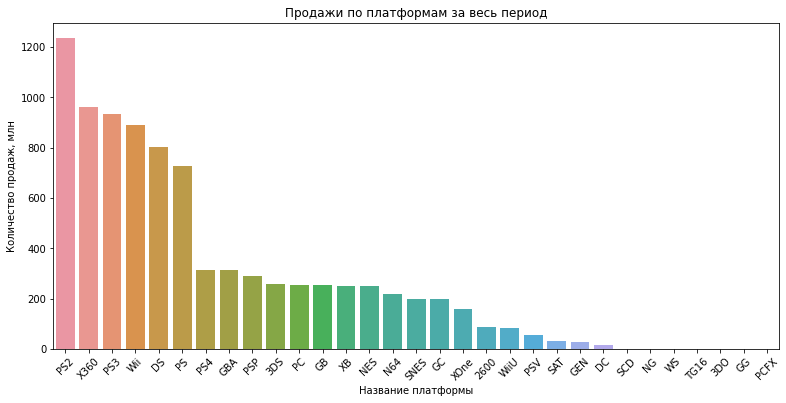

In [23]:
platform_on_sales = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title('Продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж, млн')
plt.xticks(rotation=45);

**Вывод:** Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

In [24]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные 
def year_total_sales_for_platform(name, data):
    slicee = data[(data['platform'] == name)]
    total = slicee.pivot_table(index='year_of_release', 
                               values='total_sales', 
                               aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [25]:
# Выведем таблицу по платформам и их обшим продажам, отсортируем по убыванию и оставим только топ-8
top_8_platforms = data.pivot_table(index='platform', 
                                   values='total_sales', 
                                   aggfunc='sum').sort_values(by='total_sales', ascending=False).head(8)
top_8_platforms = top_8_platforms.reset_index().rename_axis(None, axis=1)

In [26]:
top_8_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88


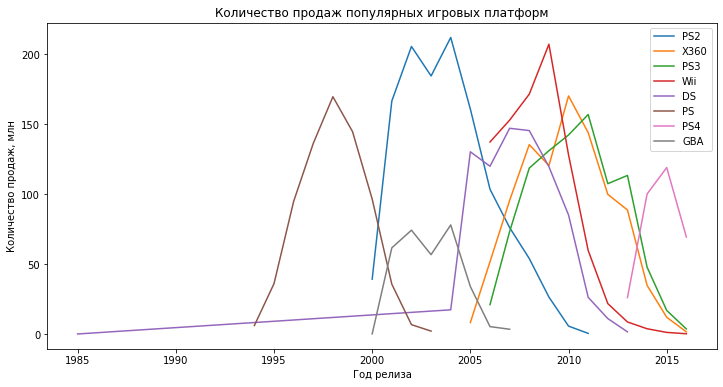

In [27]:
# Отрисуем топ-8 игровых платформ и их поведение 
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж, млн')

for i in list(top_8_platforms['platform']):
    sns.lineplot(data=year_total_sales_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

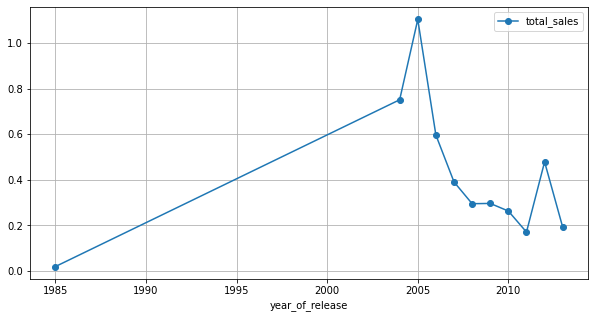

In [28]:
# Рассмотрим отдельно платформу DS, чтобы оценить выброс
(
    data.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

**Из графика видмо, что с 1985 по 2004 год платформа не выпускала игр. Удалим этот хвост.**

In [29]:
# Устраним редкие и выбивающиеся аномалии столбца platform консоли DS
data.drop(index=data.query("platform == 'DS' & year_of_release <= 2000").index, inplace=True)

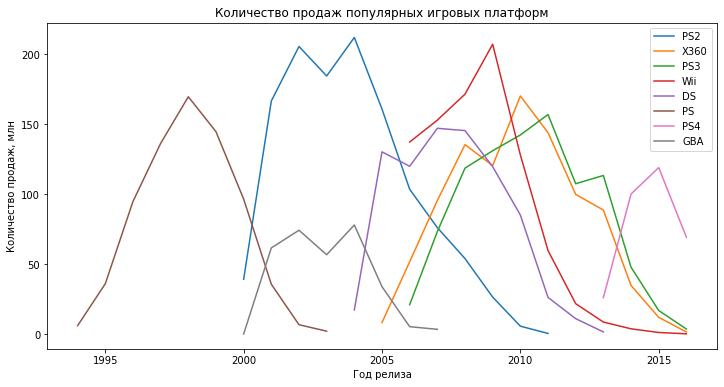

In [30]:
# Отрисуем топ-8 игровых платформ и их поведение 
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж, млн')

for i in list(top_8_platforms['platform']):
    sns.lineplot(data=year_total_sales_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

**Вывод:** Самые продаваемые платформы: PS2 и X360. В среднем каждые 5 лет появляются новые платформы. Глядя на график можно сказать, что игровые платформы существуют порядка 10 лет.

#### 3.3 Определение актуального периода 

Выберем актуальный период с 2014г. по 2016г., т.к. в этот промежуток времени представлены данные по всем популярным платформам.

In [31]:
# Оставим в выгрузке только нужные года и платформы
data_actual = data.query("2014 <= year_of_release <= 2016")

#### 3.4 Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам

In [32]:
data_actual.groupby('platform')['total_sales'].describe() # краткая статистическая сводка для данных

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [33]:
# Создадим таблицу по платформам и их обшим продажам, отсортируем их по убыванию и оставим только топ-5
top_5_platforms = data_actual.pivot_table(index='platform',
                                          values='total_sales',
                                          aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)

In [34]:
top_5_platforms

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [35]:
#Сохраним в переменной df_top_5_platforms топ-5 платформ 
df_top_5_platforms = data_actual[data_actual['platform'].isin(['PS4','XOne','3DS','PS3','X360'])]

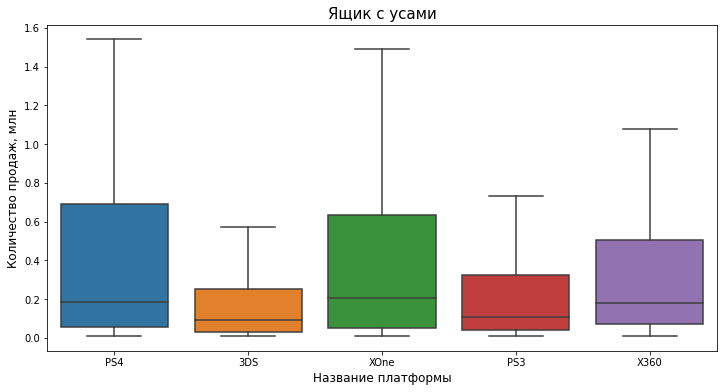

In [36]:
# Отрисуем "ящики с усами" 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales', showfliers=False)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Количество продаж, млн',fontsize=12);

**Вывод:** Из графика видно, что максимальный результут по продажам показала платформа PS4, далее с небольшим отставанием идет XOne, затем X360, и дальше PS3 и 3DS. Так же можно отметить, что медиана по платформам-лидерам колеблется в районе 0,2 млн долларов прибыли за игру. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и XOne - на уровне 1,5 млн долларов.
У остальных - от 0,6 до 1,1 миллионов долларов.

#### 3.5 Рассмотрим влияние отзывов пользователей и критиков на продажи внутри платформы Х360

In [37]:
# Корреляция между оценками пользователей и продажами 
platform_X360 = data_actual[data_actual['platform']=='X360']
platform_X360['user_score'].corr(platform_X360['total_sales'])

-0.138444570945665

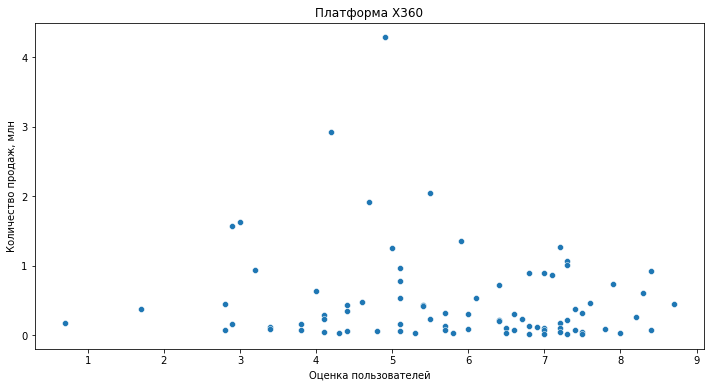

In [38]:
# Построим диаграмму рассеяния по оценкам пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(data=platform_X360, x='user_score', y='total_sales')
plt.title('Платформа Х360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж, млн');

In [39]:
# Корреляция между оценкой критиков и продажами
platform_X360['critic_score'].corr(platform_X360['total_sales'])

0.5257228356581523

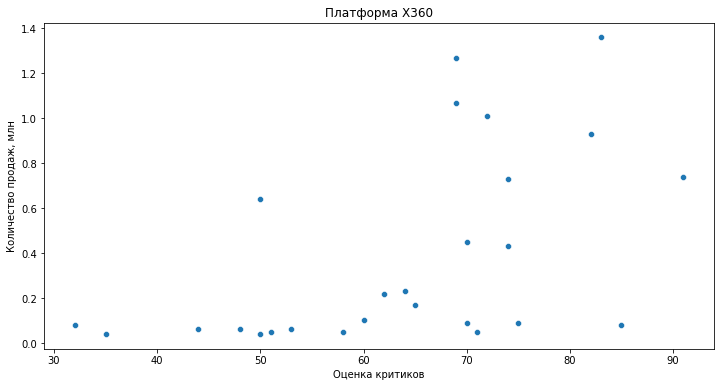

In [40]:
# Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(data=platform_X360, x='critic_score', y='total_sales')
plt.title('Платформа Х360')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж, млн');

**Вывод:** С увеличением среднего рейтинга увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику.

#### 3.6 Соотнесем выводы с продажами игр на других платформах

In [41]:
# Напишем функцию, которая будет выводить графики рассеивания и считать корреляцию
def other_platform_matrix(name_of_platform):
    platform = data_actual[data_actual['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж, млн')
    ax[1].set(ylabel='Количество продаж, млн')
    plt.show()
    
    correlation = platform['user_score'].corr(platform['total_sales'])
    critic_correlation = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.1 >= critic_correlation >= 0.0:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Очень слабая', critic_correlation)
    if 0.3 >= critic_correlation >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correlation)
    if 0.5 >= critic_correlation >= 0.3:
         print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correlation)
    if 0.7 >= critic_correlation >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correlation)
    if 0.9 >= critic_correlation >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correlation)
    if 1 >= critic_correlation >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correlation)
    
    if 0.0 >= correlation >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Очень слабая', correlation)
    if -0.1 >= correlation >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correlation)   
    if 0.1 >= correlation >= 0.0:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Очень слабая', correlation)
    if 0.3 >= correlation >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correlation)
    if 0.5 >= correlation >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correlation)
    if 0.7 >= correlation >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correlation)
    if 0.9 >= correlation >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correlation)
    if 1 >= correlation >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correlation)
    print('\n')

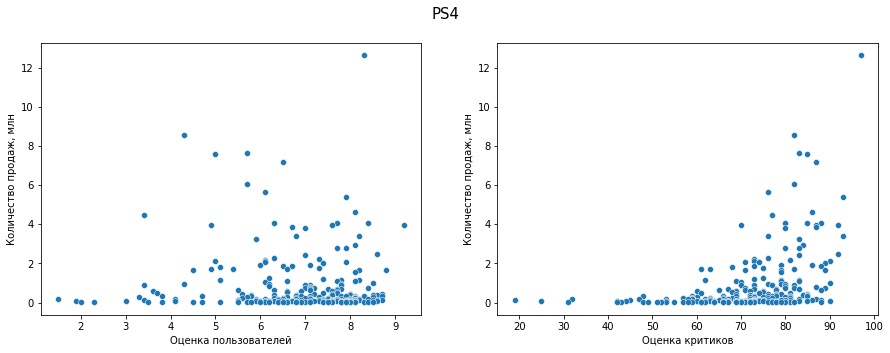

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40266141068104083
Корреляция между отзывами пользователей и продажами  PS4 : Очень слабая -0.040131589472697356




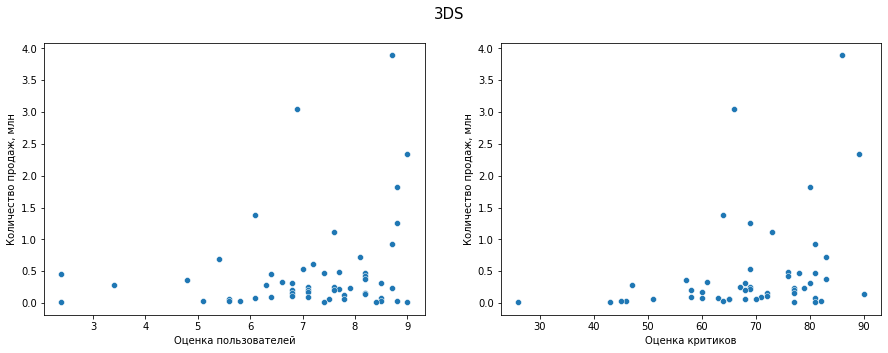

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.314117492869051
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.2151932718527028




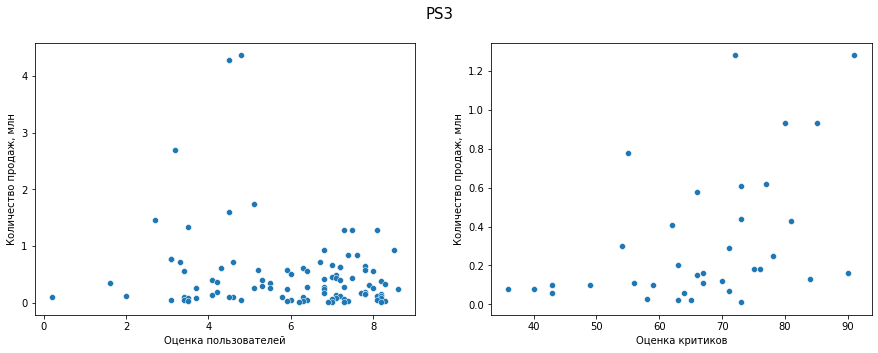

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.44657460493190704
Корреляция между отзывами пользователей и продажами  PS3 : Слабая -0.16676141347662118




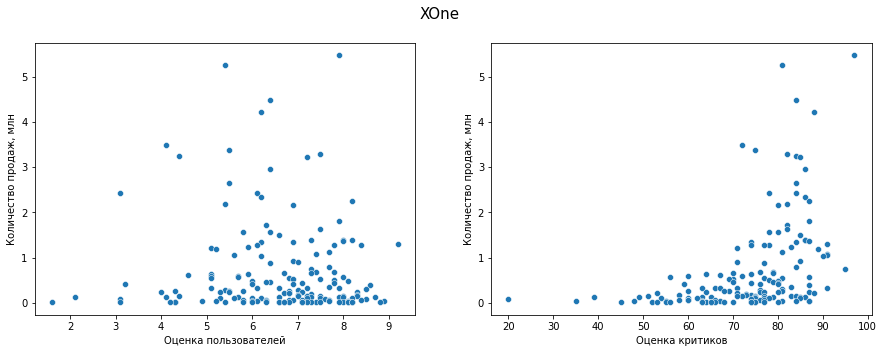

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.42867694370333226
Корреляция между отзывами пользователей и продажами  XONE : Очень слабая -0.0703839280647581




In [42]:
#С помощью цикла выведем оставшиеся 4 графика
list_of_top4_platforms = ['PS4', '3DS', 'PS3', 'XOne']
for platform in list_of_top4_platforms:
    other_platform_matrix(platform)

Вывод: Практически у всех платформ присутствует корреляция между оценками пользователей и критиков к продажам. Можно сделать вывод, что покупатели прислушиваются больше к критикам, нежели к пользователям.

#### 3.7 Рассмотрим общее распределение игр по жанрам

In [43]:
# Выведем таблицу жанров и их продажи
accum_genre = data_actual.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
accum_genre = accum_genre.reset_index().rename_axis(None, axis=1)
accum_genre

,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


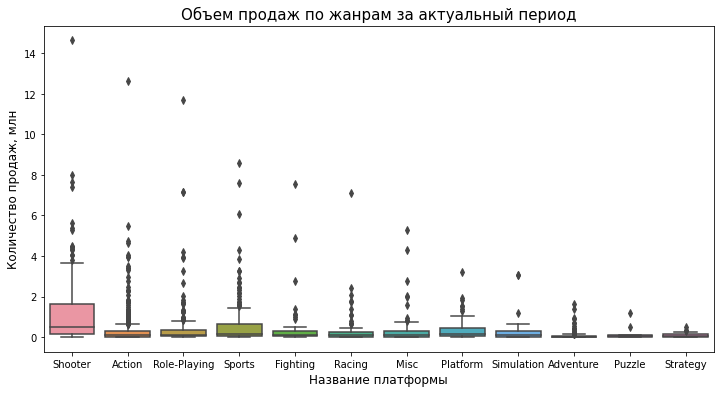

In [44]:
# Построим диаграмму размаха объема продаж по платформам за актуальный период с выбросами
plt.figure(figsize=(12,6))
sns.boxplot(data=data_actual, x='genre', y='total_sales')
plt.title('Объем продаж по жанрам за актуальный период', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Количество продаж, млн',fontsize=12);

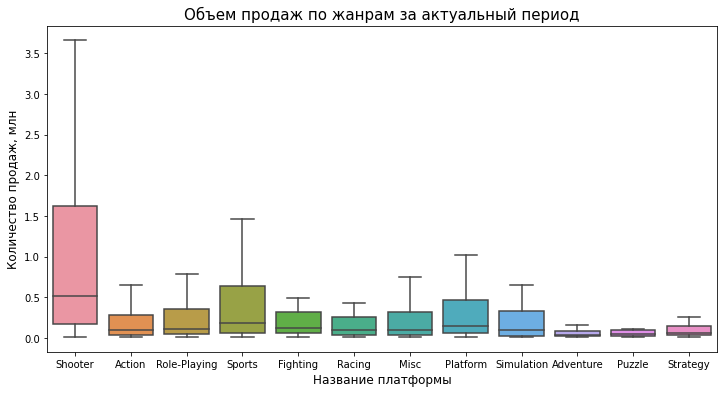

In [45]:
# Построим диаграмму размаха объема продаж по платформам за актуальный период без выбросов 
plt.figure(figsize=(12,6))
sns.boxplot(data=data_actual, x='genre', y='total_sales', showfliers=False)
plt.title('Объем продаж по жанрам за актуальный период', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Количество продаж, млн',fontsize=12);

**Наибольшее медианнное значение показал жанр Shooter, так же он имеет более длинный ряд успешно продающихся игр. Наименьшие медианные значения у Puzzle и Adventure.**

### 4. Портрет пользователя каждого региона

#### 4.1 Самые популярные платформы

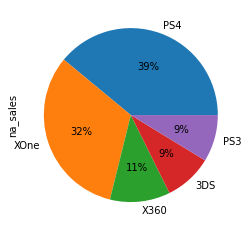

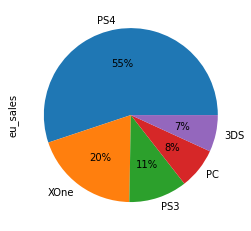

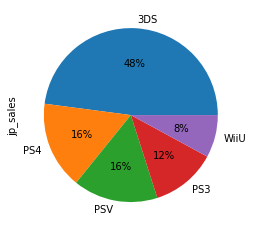

In [46]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()

**Вывод:** В Северной Америке наибольшую популярность имеют платформы PS4 и XOne, далее идут X360, 3DS и PS3.
В Европе самые популярные платформы PS4 и XOne, далее идут PS3, PC и 3DS.
В Японии наибольшую популярность имеют платформы 3DS и PS4, далее идут PSV, PS3 и WiiU.
В общем можно отметить, что предпочтения по платформам в Европе и Северной Америке очень схожи, так же видно что платформа PS4 находится в топе во всех рассматриваемых регионах.

#### 4.2 Самые популярные жанры

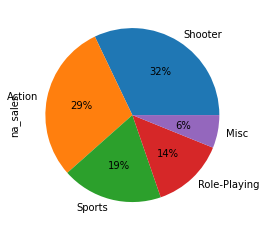

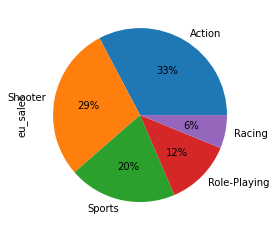

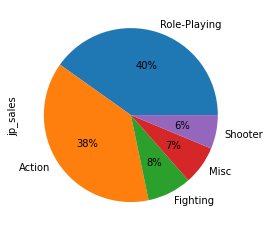

In [47]:
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()

**Вывод:** Больше всего жители Северной Америки и Европы предпочитают игры жанра Shooter и Action. В целом у этих двух регионов схожие показатели по жанрам, за исключением 5-й строчки, там в Северной Америке преобладает жанр Racing, а в Европе - Misc.
Жители Японии больше всего предпочитают игры жанра Role-Playing и Action.
В общем можно отметить что примерно 1\3 жителей каждого из рассматривыемого региона предпочитает жанр Action.

#### 4.3 Влияние рейтинга ESRB на продажи 

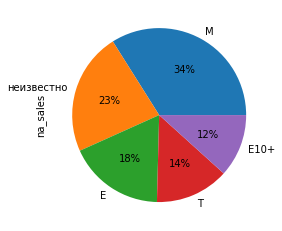

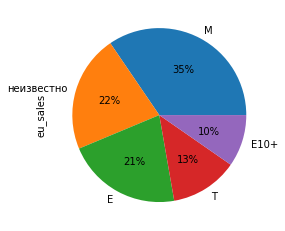

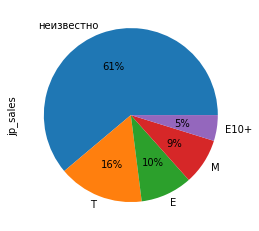

In [48]:
data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()
data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', subplots=True, figsize=(4,4), autopct='%.0f%%')
plt.show()

**Вывод:** Что касается возрастных ограничений, в Северной Америке и Европе показатели практически идентичные, лидируют игры с рейтингом М (старше 17 лет), далее по популярности игры ограничения которых не определены, затем  игры с рейтингом Е(для всех), Т(подросткам) и Е10+ (от 10 лет и старше).
В Японии же лидируют игры рейтинг которых не определен, это может быть связано с тем что у них есть свой рейтинг CERO, и японский рынок не маркирует свои игры по рейтингу ERSB, далее по популярности игры с возрастным ограничением Т(подросткам), затем  игры с рейтингом Е(для всех), М(старше 17 лет) и Е10+ (от 10 лет и старше).

### 5. Проверка гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем гипотезы:**

Нулевая гипотеза H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны;

Альтернативная гипотеза H_1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [50]:
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'], 
    data[(data['platform'] =='PC') & (data['year_of_release']>=2013)]['user_score'],
    nan_policy='omit',
    equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой. Значение p-value чуть меньше 15%, т.е. с вероятностью в 15% можно получить различность пользовательских рейтингов платформ Xbox One и PC.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

**Сформулируем гипотезы:**

Нулевая гипотеза H_0: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза H_1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [52]:
results = st.ttest_ind(
    data[(data['genre'] =='Action') & (data['year_of_release']>=2014)]['user_score'], 
    data[(data['genre'] =='Sports') & (data['year_of_release']>=2014)]['user_score'],
    nan_policy='omit',
    equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги жанров Action и Sports отличаются между собой. Значение p-value равняется 1.18*10^(-14), т.е. у нас практически отсутствует вероятность получить одинаковые средние пользовательские рейтинги жанров Action и Sports.

### 6. Общий вывод

Проведя анализ, было выявлено, что количество игр на компьютеры и игровые приставки начало расти с 90-ых годов до 2008 года. В 2008-09 годах наблюдается пик. После чего начался спад, связанный с развитием мобильных устройств.
За весь период самые популярные игровые платформы это PS2, X360, PS3, WII, DS, PS.
Самые продаваемые платформы: PS2 и X360. В среднем каждые 5 лет появляются новые платформы. Так же можно сказать, что игровые платформы существуют порядка 10 лет.

Выяснили, что в Северной Америке самые популярные игровые приставки: PS4, XOne и X360, жанры - Shooter, Action, Sports. А по рейтингу игр люди предпочитают игры "от 17 и старше".

В Европе, популярные жанры точно такие же как и в Северной Америке. Но приставки предпочитают по следующей очередности: PS4, X360, PS3. Рейтинг игр аналогичный с Северной Америкой.

В Японии люди предпочитают игровые приставки: 3DS, PS4, PSV. Жанры игры : Role-Playing, Action и Fighting. У очень большого числа игр рейтинг неизвестен, далее идут рейтинг игр Т (13-17лет) и Е (для всех).

Исходя из всех данных предположу, что лучше всего продавать игры для таких приставок как PS4 и XOne.
Жанр необходимо выбирать Action и Shooter, и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.